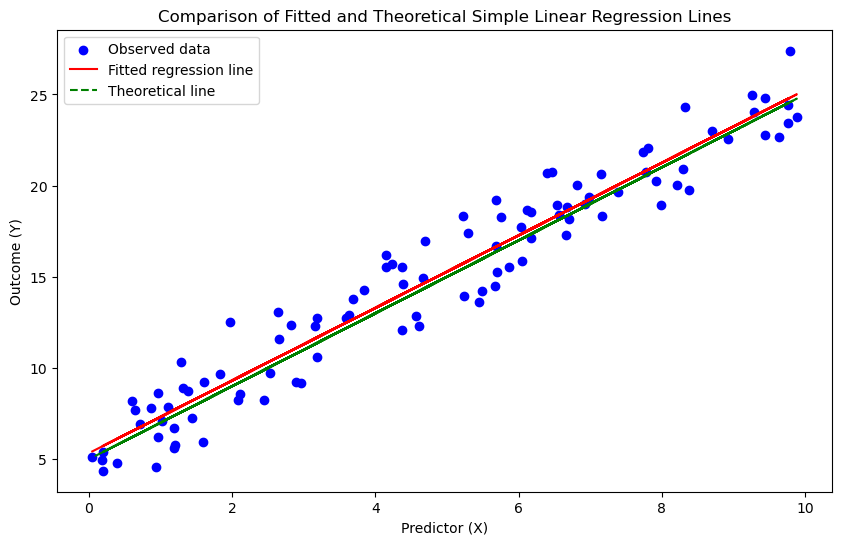

In [2]:
# Question 3 code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the true linear model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

# Set random seed for reproducibility
np.random.seed(0)

# Simulate data
n = 100  # Number of data points
X = np.random.uniform(0, 10, n)  # Predictor variable
epsilon = np.random.normal(0, sigma, n)  # Error term
Y = beta_0 + beta_1 * X + epsilon  # Outcome variable

# Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the regression model
model = smf.ols('Y ~ X', data=data).fit()
data['Y_pred'] = model.fittedvalues  # Add predictions to DataFrame

# Plot the observed data, fitted regression line, and theoretical regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed data')
plt.plot(data['X'], data['Y_pred'], color='red', label='Fitted regression line')
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', linestyle='--', label='Theoretical line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Comparison of Fitted and Theoretical Simple Linear Regression Lines')
plt.legend()
plt.show()

In [3]:
# Question 3 
# The theoretical line represents the true relationship of x and y, based on the original parameters;
# The Fitted line represents the relationship of x and y based on the sample data;
# Generally as the sample size increases, the distance between the theoretical and fitted line will minimize. 

In [9]:
# Question 4
# The fitted_model.fittedvalues are derived by plugging estimated values into the regression equation: Y = B0 + B1 X;
# B0 is the intercept found using fitted_model.params['Intercept'], B1 is the slope found using estimated as fitted_model.params['X'], and X is the predictor variable.

In [10]:
# Question 9 code 
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Define short wait times for different thresholds: 62, 64, 66
short_wait_limits = [62, 64, 66]
results = {}

# Loop through the different thresholds
for short_wait_limit in short_wait_limits:
    short_wait = old_faithful.waiting < short_wait_limit
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    results[short_wait_limit] = model.summary().tables[1]

# Display results
for limit, summary in results.items():
    print(f"Results for short wait time < {limit}:")
    print(summary)


Results for short wait time < 62:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
Results for short wait time < 64:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022
Results for short wait time < 66:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.

In [11]:
# Question 9
# At a short wait time of 62 min, the p-value is 0.238 so there is no evidence against the null hypothesis and there is no significant relationship;
# At a short wait time of 64 min, the p-value is 0.036 so there is moderate evidence against the null hypothis and there is a significant relationship;
# At a short wait time of 66 min, the p value is 0 so there is strong evidence against the null hypothesis and there is a very strong relationship. 

In [14]:
 # Question 11 code 
import plotly.express as px
import statsmodels.formula.api as smf
from IPython.display import display
import seaborn as sns

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Create the "kind" column to categorize the wait times
old_faithful['kind'] = ['short' if waiting < 68 else 'long' for waiting in old_faithful['waiting']]

# Fit the regression model with the categorical variable "kind"
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary of the model to get the coefficient and p-value for "kind"
display(model.summary().tables[1])

# Create a box plot to visualize the distribution of duration by "kind"
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind', 
             category_orders={'kind': ['short', 'long']})
fig.show()


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


In [15]:
# Question 11
# In the previous model the data waiting time was a continouse variable, but in the new modle it is a catagorial variable so it can be compared in non-linear ways. 
# As shown above the p-value is 0, which means there is strong evidence against the null hypothesis so there is a significant difference between the eruption durations for "short" and "long" wait times.

In [ ]:
# Chat bot summery
# link: https://chatgpt.com/share/672d0df1-e268-8002-9dcc-e97a443bc717
# Simple Linear Regression Theory:
    # Explained predictor, outcome variables, slope, intercept, and error term.
    # Simulated data to demonstrate regression model.
# Theoretical vs. Fitted Lines:
    # Plotted theoretical line vs. fitted line.
    # Noted that sample variation affects alignment; larger samples typically reduce this difference.
# Old Faithful Geyser Analysis:
    # Tested for linear association between waiting time and duration.
    # Analyzed short wait times (<62, <64, <66 minutes):
        # <62 minutes: no significant association.
        # <64 and <66 minutes: significant positive association seen as wait time increased.
# Categorical Model:
    # Introduced a categorical approach with "short" (<68) and "long" (≥68) wait times.
    # Compared to continuous models:
        # Categorical model captures phase-like behavior in wait time effects.
        # Emphasizes differences in mean duration between groups, potentially aligning better with observed data patterns.